In [5]:
import pandas as pd
import numpy as np
import json
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 60)

## Amateur Players Data Set

In [2]:
amateur_df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Amateur/FinalAmateurPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
amateur_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
0,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,0.000000,329.0,650.0,1.0,0.0,...,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
1,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,1.000200,6569.0,11391.0,1.0,0.0,...,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
2,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,0.495733,NaN,NaN,NaN,NaN,...,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,UTILITY,Platinum
3,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,2.000517,4320.0,12059.0,1.0,0.0,...,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
4,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,1.979017,4245.0,13217.0,NaN,NaN,...,NaN,False,Assist,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838676,EUW1_6283483863,Red,anonymous 56,euw1,Annie,17.139450,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Kindlegem,UTILITY,Gold
838677,EUW1_6283483863,Red,anonymous 56,euw1,Annie,22.688683,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Knight's Vow,UTILITY,Gold
838678,EUW1_6283483863,Red,anonymous 56,euw1,Annie,22.826867,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Glacial Buckler,UTILITY,Gold
838679,EUW1_6283483863,Red,anonymous 56,euw1,Annie,25.901700,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Kindlegem,UTILITY,Gold


In [4]:
amateur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838681 entries, 0 to 838680
Data columns (total 56 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   gameId                         838681 non-null  object 
 1   team                           838681 non-null  object 
 2   summoner                       838681 non-null  object 
 3   region                         838681 non-null  object 
 4   champion                       838681 non-null  object 
 5   timestamp                      838681 non-null  float64
 6   coordinate_x                   501376 non-null  float64
 7   coordinate_y                   501376 non-null  float64
 8   level                          306966 non-null  float64
 9   minionsKilled                  306966 non-null  float64
 10  jungleMinionsKilled            306966 non-null  float64
 11  currentGold                    306966 non-null  float64
 12  goldPerSecond                 

In [5]:
print("The data set with amateur players contains {} matches.".format(len(np.unique(amateur_df["gameId"]))))

The data set with amateur players contains 9617 matches.


In [6]:
print("The data set with amateur players contains {} players.".format(len(np.unique(amateur_df["summoner"]))))

The data set with amateur players contains 167 players.


Matches per role:

In [7]:
gameRoles = ["TOP", "JUNGLE","MIDDLE", "BOTTOM", "UTILITY"]

for role in gameRoles:
    temporary_df = amateur_df[amateur_df["role"] == role]
    matches_per_role = len(np.unique(temporary_df["gameId"]))
    print("{} matches: {}".format(role, matches_per_role))

TOP matches: 2054
JUNGLE matches: 1870
MIDDLE matches: 1788
BOTTOM matches: 1881
UTILITY matches: 2060


Players per role:

In [8]:
gameRoles = ["TOP", "JUNGLE","MIDDLE", "BOTTOM", "UTILITY"]

for role in gameRoles:
    temporary_df = amateur_df[amateur_df["role"] == role]
    players_per_role = len(np.unique(temporary_df["summoner"]))
    print("{} players: {}".format(role, players_per_role))

TOP players: 35
JUNGLE players: 34
MIDDLE players: 34
BOTTOM players: 32
UTILITY players: 32


In [ ]:
plt.figure(figsize=(14, 6))
g = sns.histplot(x='role', data=amateur_df, hue="cluster", color = "royalblue", multiple="dodge", shrink=.9);
plt.title('Game stages in the clusters')
ax=g.axes
plt.show()

Matches per division

In [27]:
ranks = ["Iron", "Bronze","Silver", "Gold", "Platinum"]

for rank in ranks:
    temporary_df = amateur_df[amateur_df["rank"] == rank]
    matches_per_division = len(np.unique(temporary_df["gameId"]))
    print("{} matches: {}".format(rank, matches_per_division))

Iron matches: 1121
Bronze matches: 2399
Silver matches: 2088
Gold matches: 1670
Platinum matches: 2340


Player per division:

In [10]:
ranks = ["Iron", "Bronze","Silver", "Gold", "Platinum"]

for rank in ranks:
    temporary_df = amateur_df[amateur_df["rank"] == rank]
    players_per_division = len(np.unique(temporary_df["summoner"]))
    print("{} players: {}".format(rank, players_per_division))

Iron players: 20
Bronze players: 39
Silver players: 36
Gold players: 33
Platinum players: 39


In [11]:
profile = ProfileReport(amateur_df, title="Amateur players Dataset Report", explorative = True, minimal = True)
#profile.to_notebook_iframe()
profile.to_file("AmateurDatasetReport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
amateur_df["magicPenPercent"].value_counts()

0.0     295609
3.0       3139
39.0      2160
6.0       1898
13.0      1208
9.0        778
15.0       656
5.0        534
12.0       494
10.0       249
7.0        241
Name: magicPenPercent, dtype: int64

Win rate

In [3]:
blueSide_amateur_df = amateur_df[amateur_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSide_amateur_df["gameId"]))
redSide_amateur_df = amateur_df[amateur_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSide_amateur_df["gameId"]))

redSideVictory_df = amateur_df[(amateur_df["team"] == "Red") & (amateur_df["victory"] == True)]
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

blueSideVictory_df = amateur_df[(amateur_df["team"] == "Blue") & (amateur_df["victory"] == True)]
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

wins_df = amateur_df[amateur_df["victory"] == True]
wins = len(np.unique(wins_df["gameId"]))

b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 51.51098901098901 vs Blue: 49.744897959183675


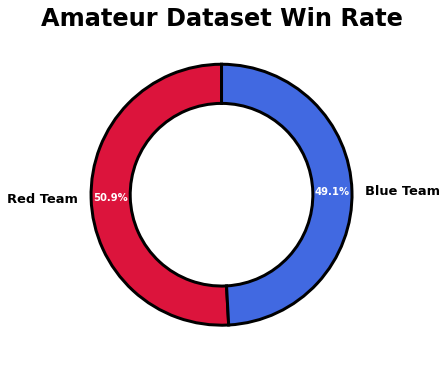

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(10)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Amateur Dataset Win Rate', fontsize=24, loc='center', fontweight="bold")

plt.show()

---

### Professional Players Data Set

In [10]:
professional_df = pd.read_csv("../Datasets/Professional/FinalProfessionalPlayersDataset.csv")
professional_df

/tmp/ipykernel_507/878669709.py:1: DtypeWarning: Columns (50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  professional_df = pd.read_csv("../Datasets/Professional/FinalProfessionalPlayersDataset.csv")


,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [13]:
professional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392071 entries, 0 to 392070
Data columns (total 55 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   gameId                         392071 non-null  object 
 1   team                           392071 non-null  object 
 2   summoner                       392071 non-null  object 
 3   region                         392071 non-null  object 
 4   champion                       392071 non-null  object 
 5   timestamp                      392071 non-null  float64
 6   coordinate_x                   217618 non-null  float64
 7   coordinate_y                   217618 non-null  float64
 8   level                          130903 non-null  float64
 9   minionsKilled                  130903 non-null  float64
 10  jungleMinionsKilled            130903 non-null  float64
 11  currentGold                    130903 non-null  float64
 12  goldPerSecond                 

In [14]:
print("The data set with professional players contains {} matches.".format(len(np.unique(professional_df["gameId"]))))

The data set with professional players contains 3946 matches.


In [15]:
print("The data set with professional players contains {} players.".format(len(np.unique(professional_df["summoner"]))))

The data set with professional players contains 100 players.


Matches per role:

In [16]:
gameRoles = ["TOP", "JUNGLE","MIDDLE", "BOTTOM", "UTILITY"]

for role in gameRoles:
    temporary_df = professional_df[professional_df["role"] == role]
    matches_per_role = len(np.unique(temporary_df["gameId"]))
    print("{} matches: {}".format(role, matches_per_role))

TOP matches: 836
JUNGLE matches: 847
MIDDLE matches: 1120
BOTTOM matches: 1080
UTILITY matches: 853


Players per role:

In [17]:
gameRoles = ["TOP", "JUNGLE","MIDDLE", "BOTTOM", "UTILITY"]

for role in gameRoles:
    temporary_df = professional_df[professional_df["role"] == role]
    players_per_role = len(np.unique(temporary_df["summoner"]))
    print("{} players: {}".format(role, players_per_role))

TOP players: 17
JUNGLE players: 20
MIDDLE players: 19
BOTTOM players: 25
UTILITY players: 19


Matches per region

In [18]:
regions = ["euw1", "na1", "kr"]

for region in regions:
    temporary_df = professional_df[professional_df["region"] == region]
    matches_per_division = len(np.unique(temporary_df["gameId"]))
    print("{} matches: {}".format(region, matches_per_division))

euw1 matches: 1847
na1 matches: 855
kr matches: 1244


Player per region:

In [19]:
regions = ["euw1", "na1", "kr"]

for region in regions:
    temporary_df = professional_df[professional_df["region"] == region]
    players_per_division = len(np.unique(temporary_df["summoner"]))
    print("{} players: {}".format(region, players_per_division))

euw1 players: 38
na1 players: 27
kr players: 35


In [20]:
profile = ProfileReport(professional_df, title="Professional Players Dataset Report", explorative = True, minimal = True)
#profile.to_notebook_iframe()
profile.to_file("ProfessionalDatasetReport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Win rate

In [11]:
blueSide_professional_df = professional_df[professional_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSide_professional_df["gameId"]))
redSide_professional_df = professional_df[professional_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSide_professional_df["gameId"]))

redSideVictory_df = professional_df[(professional_df["team"] == "Red") & (professional_df["victory"] == True)]
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

blueSideVictory_df = professional_df[(professional_df["team"] == "Blue") & (professional_df["victory"] == True)]
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

wins_df = professional_df[professional_df["victory"] == True]
wins = len(np.unique(wins_df["gameId"]))

b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 61.770966368667516 vs Blue: 41.08131119625372


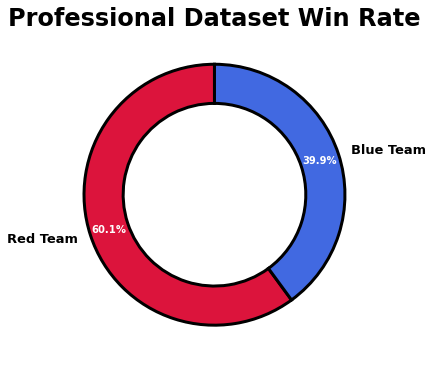

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(10)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Professional Dataset Win Rate', fontsize=24, loc='center', fontweight="bold")

plt.show()